To get all the data from all surverys covering 5c7.269 using vizier

In [27]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import astropy.units as u
from astroquery.simbad import Simbad
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import Angle
import matplotlib.pyplot as plt

In [69]:
df = pd.DataFrame(columns=['ID','description'])

In [70]:
result = Vizier.query_object("NVSS J082838+252827")
for table in result:
    item = table.meta
    # print(item)
    df = df.append(item, ignore_index=True)

print(df)

                              ID  \
0                      I_252_out   
1                      I_254_out   
2                      I_255_out   
3                      I_267_out   
4                      I_271_out   
..                           ...   
141    J_MNRAS_463_4210_ucac4rpm   
142    J_MNRAS_474_5008_spidxcat   
143     J_MNRAS_495_3087_catalog   
144       J_MNRAS_507_318_table2   
145  J_other_AstBu_64_123_table1   

                                           description  \
0                                   The Full Catalogue   
1                 output (out of 25,258,765 positions)   
2                 output (out of 25,258,765 positions)   
3                      The Full Northern APM Catalogue   
4      The Full GSC2.2.1 Catalogue (455851237 objects)   
..                                                 ...   
141                             UCAC4-RPM catalog v1.0   
142                          *Spectral index catalogue   
143  Photometrically derived Teff, logg, {DEL

/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(item, ignore_index=True)
/tmp/ipykernel_34898/2979353161.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [82]:
df['name']

0                        I/252/out
1                        I/254/out
2                        I/255/out
3                        I/267/out
4                        I/271/out
5                        I/284/out
6                        I/289/out
7                        I/297/out
8                        I/304/out
9                        I/305/out
10                    I/312/sample
11                    I/317/sample
12                       I/319/xpm
13                      I/322A/out
14                     I/324/igsl3
15                     I/327/cmc15
16                     I/329/urat1
17                      I/331/apop
18                      I/337/gaia
19                      I/339/hsoy
20                     I/340/ucac5
21                        I/342/f3
22                     I/345/gaia2
23                  I/347/gaia2dis
24                 I/349/starhorse
25                  I/350/gaiaedr3
26                  I/350/comscanl
27                    I/351/gps1_p
28                  

Query using coordinate instaed of Object?

In [6]:
data_5C7 = Simbad.query_object("5C7.269")

In [7]:
# query surrounding 420 arcsec from the coordinate of 5C7.269
surrounding_5C7 = Simbad.query_region("5C7.269", radius=420 * u.arcsec)

print(surrounding_5C7)

          MAIN_ID                 RA      ... SCRIPT_NUMBER_ID
                               "h:m:s"    ...                 
--------------------------- ------------- ... ----------------
        NVSS J082838+252827  08 28 38.681 ...                1
Gaia DR2 679639477507524736 08 28 32.3058 ...                1
   SDSS J082829.53+252621.7 08 28 29.5404 ...                1
   SDSS J082848.16+253129.8 08 28 48.1704 ...                1
   SDSS J082827.67+253128.6  08 28 27.676 ...                1
    2MASX J08284048+2523400  08 28 40.532 ...                1
             TYC 1944-943-1 08 28 18.1981 ...                1
   SDSS J082858.82+252623.0  08 28 58.820 ...                1
   SDSS J082857.98+253151.2  08 28 57.989 ...                1
   SDSS J082855.32+252423.5  08 28 55.324 ...                1
   SDSS J082848.34+253355.5  08 28 48.345 ...                1
            TYC 1944-1101-1 08 28 22.4297 ...                1
   SDSS J082840.78+253509.5  08 28 40.781 ...          

In [8]:
surrounding_5C7.colnames

['MAIN_ID',
 'RA',
 'DEC',
 'RA_PREC',
 'DEC_PREC',
 'COO_ERR_MAJA',
 'COO_ERR_MINA',
 'COO_ERR_ANGLE',
 'COO_QUAL',
 'COO_WAVELENGTH',
 'COO_BIBCODE',
 'SCRIPT_NUMBER_ID']

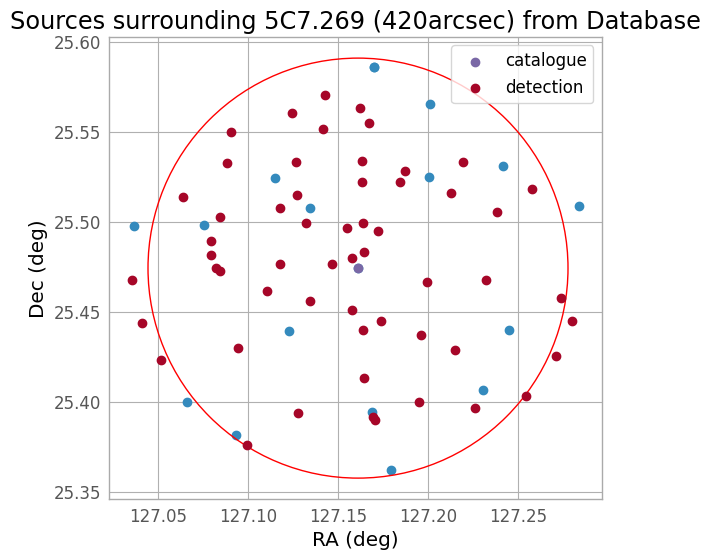

In [43]:
# plot the surrounding 5C7.269
plt.style.use(astropy_mpl_style)
c = SkyCoord(ra=surrounding_5C7['RA'], dec=surrounding_5C7['DEC'], unit=(u.hourangle, u.deg))
plt.scatter(c.ra.deg, c.dec.deg)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Sources surrounding 5C7.269 (420arcsec) from Database')
# set plot to have same x and y scale
plt.gca().set_aspect('equal', adjustable='box')
# plt.show()

coor_5C7 = SkyCoord(ra=data_5C7['RA'], dec=data_5C7['DEC'], unit=(u.hourangle, u.deg))
plt.scatter(coor_5C7.ra.deg, coor_5C7.dec.deg, label='catalogue')
radius = Angle(420, u.arcsec).deg
# plot a circle with radius 420 arcsec
circle = plt.Circle((coor_5C7.ra.deg, coor_5C7.dec.deg), radius, color='r', fill=False)
plt.gca().add_patch(circle)

detection = pd.read_table('5C7.269_sources.dat',sep='\s+',index_col='obj_id')
coor_detection = SkyCoord(ra=detection['ra'], dec=detection['dec'], unit=(u.hourangle, u.deg))
plt.scatter(coor_detection.ra.deg, coor_detection.dec.deg, label='detection')
plt.legend()

In [66]:
bibcode = surrounding_5C7.to_pandas()['COO_BIBCODE'].value_counts()

In [68]:
for i in bibcode.index:
    print(i)

2020ApJS..250....8L
2020yCat.1350....0G
2015ApJ...801...26H
2009ApJS..182..543A
2018yCat.1345....0G
2015ApJS..219...12A
2011ApJ...736...21S


In [72]:
catalog_source = pd.DataFrame(columns=['ID','description','N_galaxy'])
for bcode,occ in bibcode.items():
    print(bcode, occ)
    survey = Vizier.get_catalogs(bcode)
    description = survey[0].meta['description']
    row = {'ID':bcode, 'description':description, 'N_galaxy':occ}
    catalog_source = catalog_source.append(row, ignore_index=True)
    print(description)
catalog_source

2020ApJS..250....8L 6
The SDSS quasar-only catalog from DR16 (DR16Q)
2020yCat.1350....0G 5
GaiaSource EDR3 data
2015ApJ...801...26H 2
The FIRST survey catalog, 14Dec17 Version
2009ApJS..182..543A 2
* output of the SDSS photometric catalog
2018yCat.1345....0G 1


/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)
/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)
/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)
/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)


GaiaSource DR2 data
2015ApJS..219...12A 1
* output of the SDSS photometric catalog
2011ApJ...736...21S 1
Catalog of galaxy clusters, with errors and ranges


/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)
/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)
/tmp/ipykernel_50723/1337864434.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  catalog_source = catalog_source.append(row, ignore_index=True)


,ID,description,N_galaxy
0,2020ApJS..250....8L,The SDSS quasar-only catalog from DR16 (DR16Q),6
1,2020yCat.1350....0G,GaiaSource EDR3 data,5
2,2015ApJ...801...26H,"The FIRST survey catalog, 14Dec17 Version",2
3,2009ApJS..182..543A,* output of the SDSS photometric catalog,2
4,2018yCat.1345....0G,GaiaSource DR2 data,1
5,2015ApJS..219...12A,* output of the SDSS photometric catalog,1
6,2011ApJ...736...21S,"Catalog of galaxy clusters, with errors and ra...",1


In [54]:
from astroquery.vizier import Vizier

bibcode = "2020ApJS..250....8L"
result = Vizier.find_catalogs(bibcode)

# survey_name = result[list(result.keys())[0]].meta['Title']
# print(f"Survey name: {survey_name}")


In [58]:
Vizier.ROW_LIMIT = 10
survey = Vizier.get_catalogs(result.keys())

In [64]:
survey[0].meta['description']

'The "superset" of all SDSS-IV/eBOSS objects targeted as quasars'